## Impact of September 11 on Travel in the United States:

The Research and Innovative Technology Administration’s Bureau of Transportation Statistics (BTS) conducted a study to evaluate the impact of the September 11, 2001, terrorist attack on U.S. transportation.

The report analyzes monthly passenger movement data between January 1990 and Dec 2003. Data on three monthly time series are given in the file Sept11Travel.xls for this period:
* actual airline revenue passenger miles (Air)
* rail passenger miles (Rail)
* vehicle miles traveled (Auto)

In order to assess the impact of September 11, use the following approach:
* Using data before September 11, forecast future data (under the assumption of no terrorist attack)
* Then, compare the forecasted series with the actual data to assess the impact of the event

In [1]:
import pandas as pd 
import numpy as np 
from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt 
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv('Sept11Travel.csv', parse_dates=['Month'])
print(df.head())

    Month       Air       Rail    Road
0  Jan-90  35153577  454115779  163.28
1  Feb-90  32965187  435086002  153.25
2  Mar-90  39993913  568289732  178.42
3  Apr-90  37981886  568101697  178.68
4  May-90  38419672  539628385  188.88


In [4]:
#Create a date range for the dataset
dates = pd.date_range(start='1990-01-01', freq='MS', periods=len(df))
dates

DatetimeIndex(['1990-01-01', '1990-02-01', '1990-03-01', '1990-04-01',
               '1990-05-01', '1990-06-01', '1990-07-01', '1990-08-01',
               '1990-09-01', '1990-10-01',
               ...
               '2003-03-01', '2003-04-01', '2003-05-01', '2003-06-01',
               '2003-07-01', '2003-08-01', '2003-09-01', '2003-10-01',
               '2003-11-01', '2003-12-01'],
              dtype='datetime64[ns]', length=168, freq='MS')

In [5]:
#Create a new column for month and use the month from the created date range
import calendar
df['Mon'] = dates.month
df.head()

Month       Air       Rail    Road  Mon
0  Jan-90  35153577  454115779  163.28    1
1  Feb-90  32965187  435086002  153.25    2
2  Mar-90  39993913  568289732  178.42    3
3  Apr-90  37981886  568101697  178.68    4
4  May-90  38419672  539628385  188.88    5

In [6]:
#Rename the numbers in the Month column to calendar months
df['Mon'] = df['Mon'].apply(lambda x: calendar.month_abbr[x])
df['Mon'].head()

0    Jan
1    Feb
2    Mar
3    Apr
4    May
Name: Mon, dtype: object

In [7]:
#Create a new column for year and use the year from the created date range
df['Year'] = dates.year
df['Year'].head()

0    1990
1    1990
2    1990
3    1990
4    1990
Name: Year, dtype: int64

In [8]:
df.drop(['Month'], axis=1, inplace=True)
df.head()

Air       Rail    Road  Mon  Year
0  35153577  454115779  163.28  Jan  1990
1  32965187  435086002  153.25  Feb  1990
2  39993913  568289732  178.42  Mar  1990
3  37981886  568101697  178.68  Apr  1990
4  38419672  539628385  188.88  May  1990

### Air

In [9]:
df.index = dates
df = df[['Air']]
df.head(141)

Air
1990-01-01  35153577
1990-02-01  32965187
1990-03-01  39993913
1990-04-01  37981886
1990-05-01  38419672
1990-06-01  42819023
1990-07-01  45770315
1990-08-01  48763670
1990-09-01  38173223
1990-10-01  39051877
1990-11-01  35699216
1990-12-01  37444088
1991-01-01  34848290
1991-02-01  29672427
1991-03-01  36202993
1991-04-01  37146602
1991-05-01  38869421
1991-06-01  42199760
1991-07-01  45384965
1991-08-01  48164550
1991-09-01  38481957
1991-10-01  39062110
1991-11-01  34688141
1991-12-01  38575165
1992-01-01  35265807
1992-02-01  33868884
1992-03-01  39724539
1992-04-01  37294373
1992-05-01  39728367
1992-06-01  45754460
...              ...
1999-04-01  54968382
1999-05-01  55469960
1999-06-01  59918608
1999-07-01  64397523
1999-08-01  63752132
1999-09-01  53733696
1999-10-01  57407208
1999-11-01  53866781
1999-12-01  52331272
2000-01-01  49745428
2000-02-01  49876910
2000-03-01  61378569
2000-04-01  58981617
2000-05-01  61165486
2000-06-01  65524091
2000-07-01  67883256
2000-08-01  66924512
2000-09-01  56441629
2000-10-01  58834210
2000-11-01  56283261
2000-12-01  55380280
2001-01-01  53129922
2001-02-01  49992995
2001-03-01  62323049
2001-04-01  59801562
2001-05-01  60246477
2001-06-01  64987625
2001-07-01  68573410
2001-08-01  69003617
2001-09-01  39106905

[141 rows x 1 columns]

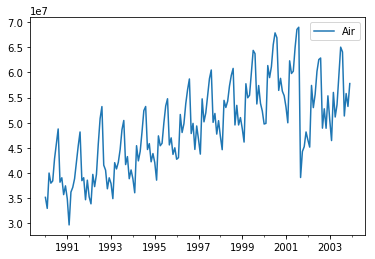

In [10]:
df.plot()

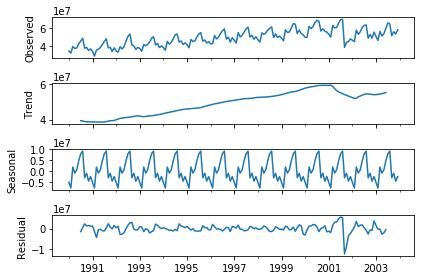

In [11]:
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.api as sm

decompAir = seasonal_decompose(df, model='additive', freq=12)
decompAir.plot()
plt.show()

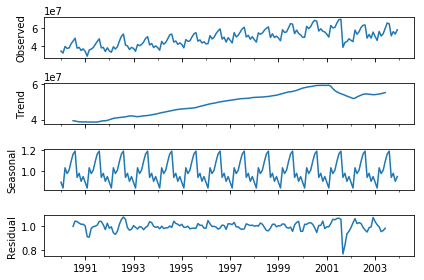

In [12]:
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.api as sm

decompAir = seasonal_decompose(df, model='multiplicative', freq=12)
decompAir.plot()
plt.show()

In [13]:
#Creating train and test set 
train=df[0:140] 
test=df[140:]

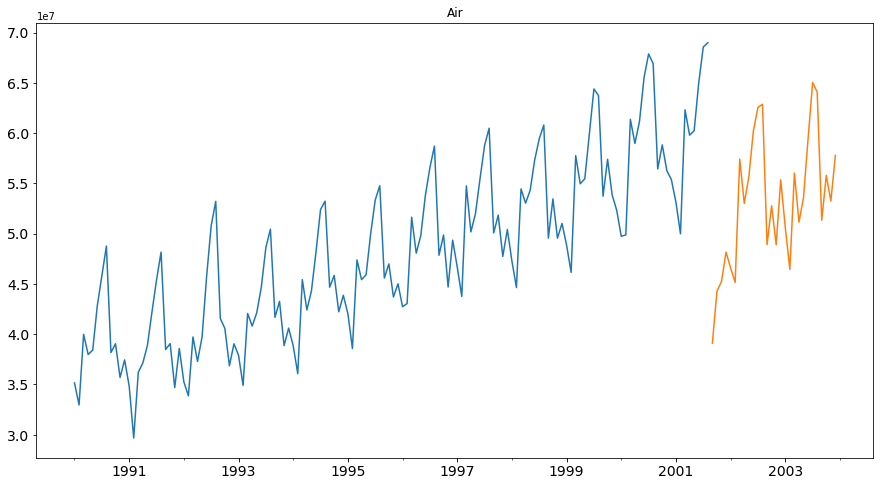

In [14]:
#Plot data
train.Air.plot(figsize=(15,8), title= 'Air', fontsize=14)
test.Air.plot(figsize=(15,8), title= 'Air', fontsize=14)


### Naive Approach: \hat{y}t+1 = yt

In [15]:
x_train = train.drop('Air', axis=1)
x_test = test.drop('Air', axis=1)
y_train = train[['Air']]
y_test = test[['Air']]

In [16]:
dd= np.asarray(train.Air)

In [17]:
dd

array([35153577, 32965187, 39993913, 37981886, 38419672, 42819023,
       45770315, 48763670, 38173223, 39051877, 35699216, 37444088,
       34848290, 29672427, 36202993, 37146602, 38869421, 42199760,
       45384965, 48164550, 38481957, 39062110, 34688141, 38575165,
       35265807, 33868884, 39724539, 37294373, 39728367, 45754460,
       50807813, 53219046, 41564915, 40578092, 36863415, 39045016,
       37911556, 34902869, 42058882, 40814097, 42133943, 44679864,
       48622037, 50451675, 41677832, 43264475, 38868799, 40610043,
       38863562, 36068535, 45433842, 42418163, 44297210, 48169096,
       52410979, 53235052, 44677623, 45845403, 42230318, 43868116,
       42050940, 38580784, 47390145, 45427499, 45915722, 49992583,
       53345749, 54776466, 45589237, 46993036, 43703386, 45015358,
       42734234, 43056589, 51646570, 48063492, 49808809, 53774378,
       56576582, 58714135, 47857913, 49873317, 44696485, 49361193,
       46692784, 43761932, 54755166, 50182894, 51979543, 55462

In [18]:
y_hat = test.copy()

In [19]:
y_hat['naive'] = dd[len(dd)-1]

Text(0.5, 1.0, 'Naive Forecast')

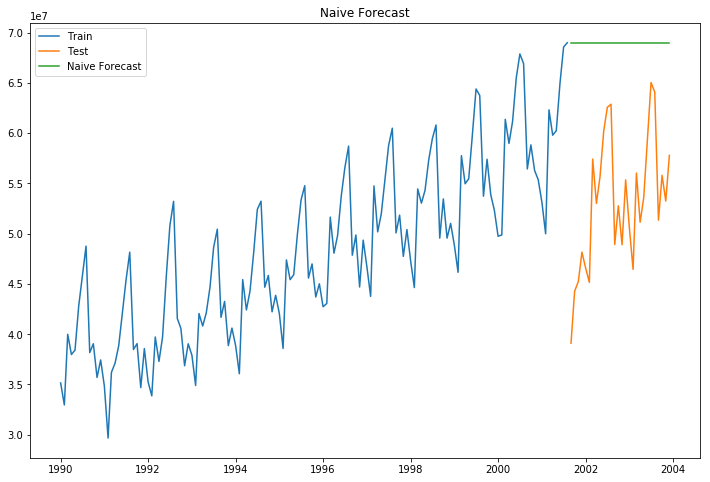

In [20]:
plt.figure(figsize=(12,8))
plt.plot(train.index, train['Air'], label='Train')
plt.plot(test.index,test['Air'], label='Test')
plt.plot(y_hat.index,y_hat['naive'], label='Naive Forecast')
plt.legend(loc='best')
plt.title("Naive Forecast")

In [21]:
#RMSE Calculation
rmse = sqrt(mean_squared_error(test.Air, y_hat.naive))
rmse = round(rmse, 3)
rmse

17027637.934

In [22]:
abs_error = np.abs(y_test['Air']-y_hat.naive)
actual = y_test['Air']
mape = np.round(np.mean(abs_error/actual),4)
mape

0.3157

In [23]:
resultsDf = pd.DataFrame({'Method':['Naive forecast'], 'rmse': [rmse]})
resultsDf

resultsDf = pd.DataFrame({'Method':['Naive forecast'], 'MAPE': [mape], 'rmse': [rmse]})
resultsDf = resultsDf[['Method', 'rmse', 'MAPE']]
resultsDf

Method          rmse    MAPE
0  Naive forecast  1.702764e+07  0.3157

### Moving Average

In [24]:
df1 = df.copy()

In [25]:
df1['moving_avg_forecast'] = df['Air'].rolling(12).mean()

In [26]:
df1.head(2)

Air  moving_avg_forecast
1990-01-01  35153577                  NaN
1990-02-01  32965187                  NaN

In [27]:
df1.tail(2)

Air  moving_avg_forecast
2003-11-01  53249129         5.517964e+07
2003-12-01  57795908         5.538301e+07

In [28]:
#Creating train and test set 
train=df1[0:140] 
test=df1[140:]

In [29]:
y_hat_avg = test.copy()

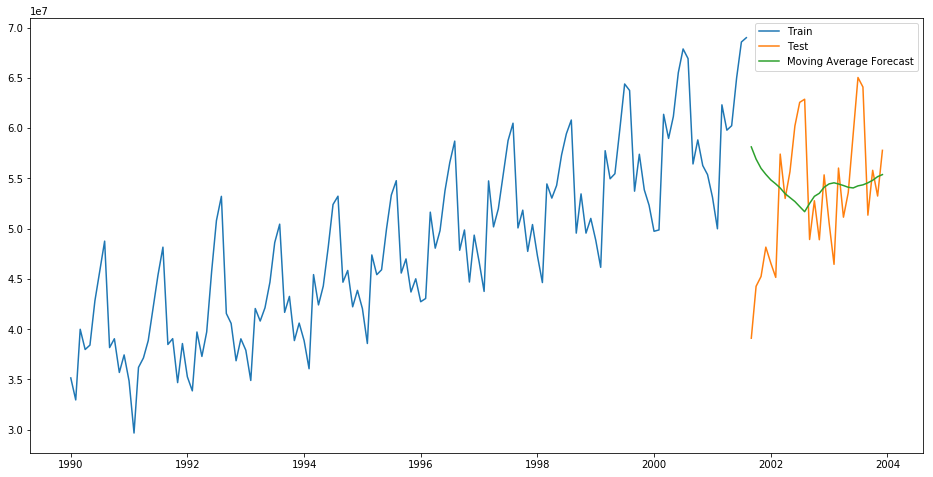

In [30]:
plt.figure(figsize=(16,8))
plt.plot(train['Air'], label='Train')
plt.plot(test['Air'], label='Test')
plt.plot(y_hat_avg['moving_avg_forecast'], label='Moving Average Forecast')
plt.legend(loc='best')

In [31]:
y_hat_avg.moving_avg_forecast

2001-09-01    5.813861e+07
2001-10-01    5.692501e+07
2001-11-01    5.600516e+07
2001-12-01    5.540410e+07
2002-01-01    5.485892e+07
2002-02-01    5.445597e+07
2002-03-01    5.404764e+07
2002-04-01    5.348194e+07
2002-05-01    5.310003e+07
2002-06-01    5.270307e+07
2002-07-01    5.220280e+07
2002-08-01    5.169264e+07
2002-09-01    5.251090e+07
2002-10-01    5.321998e+07
2002-11-01    5.352478e+07
2002-12-01    5.412377e+07
2003-01-01    5.445835e+07
2003-02-01    5.456655e+07
2003-03-01    5.445071e+07
2003-04-01    5.429518e+07
2003-05-01    5.412250e+07
2003-06-01    5.405602e+07
2003-07-01    5.426196e+07
2003-08-01    5.436310e+07
2003-09-01    5.456488e+07
2003-10-01    5.481744e+07
2003-11-01    5.517964e+07
2003-12-01    5.538301e+07
Freq: MS, Name: moving_avg_forecast, dtype: float64

In [32]:
rmse = sqrt(mean_squared_error(test.Air, y_hat_avg.moving_avg_forecast))
rmse = round(rmse, 3)
rmse

7422686.819

In [33]:
abs_error = np.abs(y_test['Air']-y_hat_avg.moving_avg_forecast)
actual = y_test['Air']
mape = np.round(np.mean(abs_error/actual),4)
mape

0.1158

In [34]:
tempResultsDf = pd.DataFrame({'Method':['Moving average forecast'], 'rmse': [rmse],'MAPE': [mape] })
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'rmse', 'MAPE']]
resultsDf

Method          rmse    MAPE
0           Naive forecast  1.702764e+07  0.3157
0  Moving average forecast  7.422687e+06  0.1158

In [35]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [36]:
# create class
model = SimpleExpSmoothing(train['Air'])

In [37]:
# fit model
model_fit = model.fit(smoothing_level=0.1,optimized=False)
model_fit.params

{'smoothing_level': 0.1,
 'smoothing_slope': None,
 'smoothing_seasonal': None,
 'damping_slope': nan,
 'initial_level': 35153577.0,
 'initial_slope': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [38]:
y_hat_avg = test.copy()

In [39]:
y_hat_avg['SES'] = model_fit.forecast(len(test['Air']))

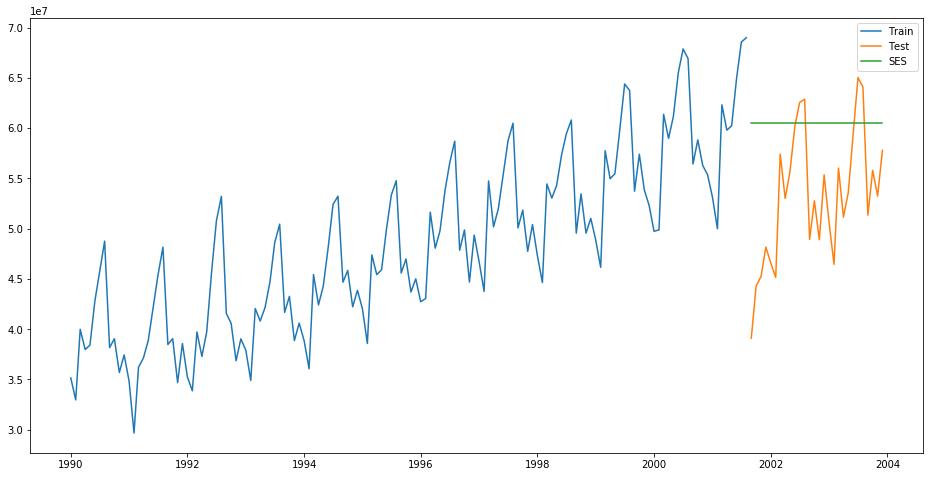

In [40]:
plt.figure(figsize=(16,8))
plt.plot(train['Air'], label='Train')
plt.plot(test['Air'], label='Test')
plt.plot(y_hat_avg['SES'], label='SES')
plt.legend(loc='best')

In [41]:
rmse = sqrt(mean_squared_error(test.Air, y_hat_avg.SES))
rmse = round(rmse, 3)
rmse

9723903.579

In [42]:
abs_error = np.abs(y_test['Air']-y_hat_avg.SES)
actual = y_test['Air']
mape = np.round(np.mean(abs_error/actual),4)
mape

0.1679

In [43]:
tempResultsDf = pd.DataFrame({'Method':['SES forecast'], 'rmse': [rmse],'MAPE': [mape] })
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'rmse', 'MAPE']]
resultsDf

Method          rmse    MAPE
0           Naive forecast  1.702764e+07  0.3157
0  Moving average forecast  7.422687e+06  0.1158
0             SES forecast  9.723904e+06  0.1679

### Holts Method

In [44]:
fit1 = ExponentialSmoothing(np.asarray(train['Air']) ,seasonal_periods=12 ,trend='add', seasonal='None').fit()
fit1.params

{'smoothing_level': 0.7523913295806696,
 'smoothing_slope': 0.0,
 'smoothing_seasonal': nan,
 'damping_slope': nan,
 'initial_level': 35153577.0,
 'initial_slope': 3.321196265077046e-08,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [45]:
y_hat_avg['Holt'] = fit1.forecast(len(test))


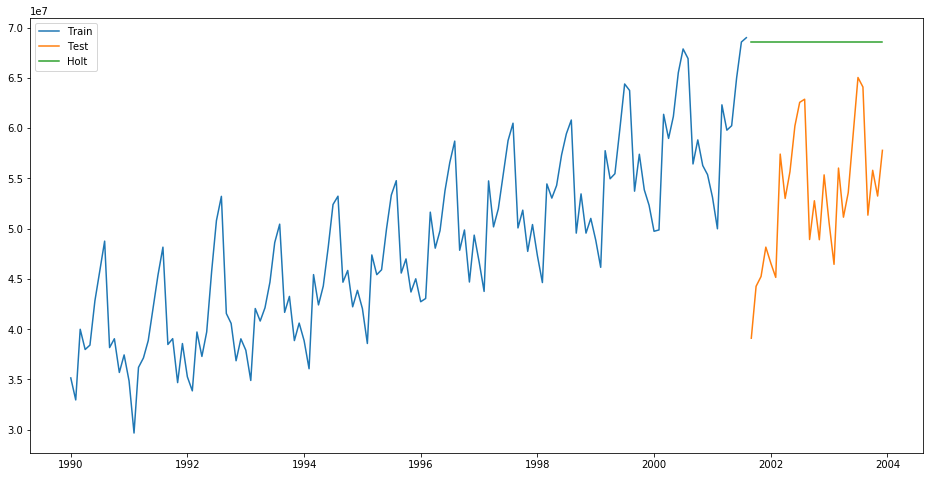

In [46]:
plt.figure(figsize=(16,8))
plt.plot( train['Air'], label='Train')
plt.plot(test['Air'], label='Test')
plt.plot(y_hat_avg['Holt'], label='Holt')
plt.legend(loc='best')

In [47]:
rmse = sqrt(mean_squared_error(test.Air, y_hat_avg.Holt))
rmse = round(rmse, 3)
rmse

16657877.645

In [48]:
abs_error = np.abs(y_test['Air']-y_hat_avg.Holt)
actual = y_test['Air']
mape = np.round(np.mean(abs_error/actual),4)
mape

0.3081

In [49]:
tempResultsDf = pd.DataFrame({'Method':['Holt'], 'rmse': [rmse],'MAPE': [mape] })
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'rmse', 'MAPE']]
resultsDf

Method          rmse    MAPE
0           Naive forecast  1.702764e+07  0.3157
0  Moving average forecast  7.422687e+06  0.1158
0             SES forecast  9.723904e+06  0.1679
0                     Holt  1.665788e+07  0.3081

### Holt-Winters Method - Additive

In [50]:
y_hat_avg = test.copy()

In [51]:
fit1 = ExponentialSmoothing(np.asarray(train['Air']) ,seasonal_periods=12 ,trend='add', seasonal='add').fit()
fit1.params

{'smoothing_level': 0.22702495876147769,
 'smoothing_slope': 0.03321237360495112,
 'smoothing_seasonal': 0.41368429607051266,
 'damping_slope': nan,
 'initial_level': 42712347.70289605,
 'initial_slope': 0.0003284512974835479,
 'initial_seasons': array([-7558771.83333334, -9747160.42018793, -2718435.83317517,
        -4730462.55070427, -4292676.83333333,   106674.16662712,
         3057966.16682483,  6051321.16658756, -4539125.83333334,
        -3660472.39859152, -7013132.83325427, -5268260.83333333]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [52]:
y_hat_avg['Holt_Winter'] = fit1.forecast(len(test))

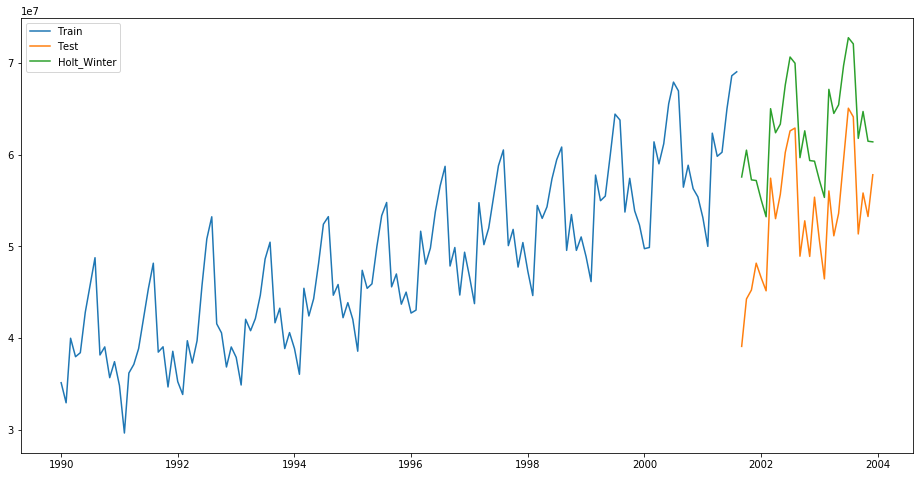

In [53]:
plt.figure(figsize=(16,8))
plt.plot( train['Air'], label='Train')
plt.plot(test['Air'], label='Test')
plt.plot(y_hat_avg['Holt_Winter'], label='Holt_Winter')
plt.legend(loc='best')

In [54]:
rmse = sqrt(mean_squared_error(test.Air, y_hat_avg.Holt_Winter))
rmse = round(rmse, 3)
rmse

9869915.218

In [55]:
abs_error = np.abs(y_test['Air']-y_hat_avg.Holt_Winter)
actual = y_test['Air']
mape = np.round(np.mean(abs_error/actual),4)
mape

0.1836

In [56]:
tempResultsDf = pd.DataFrame({'Method':['Holt Winter forecast - Additive'], 'rmse': [rmse],'MAPE': [mape] })
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'rmse', 'MAPE']]
resultsDf

Method          rmse    MAPE
0                   Naive forecast  1.702764e+07  0.3157
0          Moving average forecast  7.422687e+06  0.1158
0                     SES forecast  9.723904e+06  0.1679
0                             Holt  1.665788e+07  0.3081
0  Holt Winter forecast - Additive  9.869915e+06  0.1836

In [57]:
resultsDf.index = [i for i in range(len(resultsDf))]
resultsDf

Method          rmse    MAPE
0                   Naive forecast  1.702764e+07  0.3157
1          Moving average forecast  7.422687e+06  0.1158
2                     SES forecast  9.723904e+06  0.1679
3                             Holt  1.665788e+07  0.3081
4  Holt Winter forecast - Additive  9.869915e+06  0.1836

### Holt-Winters Method - Multiplicative

In [58]:
fit1 = ExponentialSmoothing(np.asarray(train['Air']) ,seasonal_periods=12 ,trend='add', seasonal='mul').fit()
fit1.params

{'smoothing_level': 0.21596064019702851,
 'smoothing_slope': 0.029780132667680915,
 'smoothing_seasonal': 0.518025074078656,
 'damping_slope': nan,
 'initial_level': 42712348.83333336,
 'initial_slope': 1.0464705677883765e-07,
 'initial_seasons': array([0.82453065, 0.75450084, 0.91697233, 0.886181  , 0.91123264,
        1.01168003, 1.08996131, 1.15625811, 0.91553804, 0.92898436,
        0.84276919, 0.89609152]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [59]:
y_hat_avg['Holt_Winter'] = fit1.forecast(len(test))

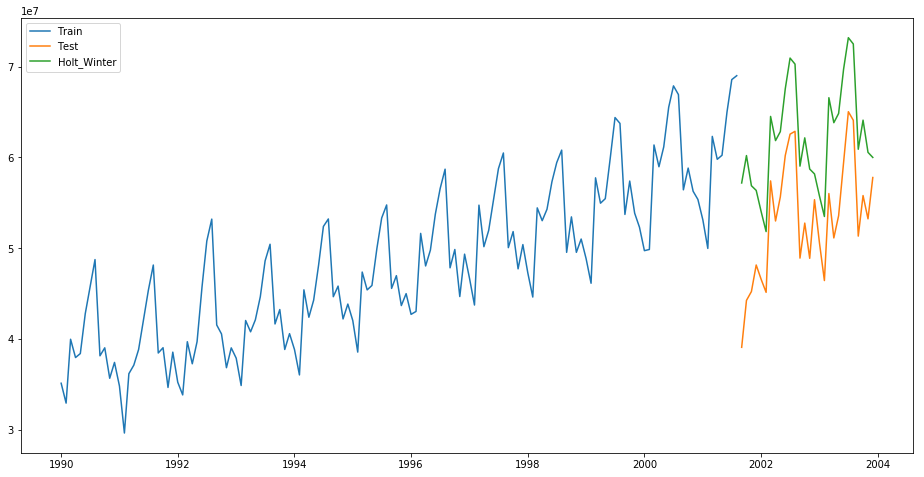

In [60]:
plt.figure(figsize=(16,8))
plt.plot( train['Air'], label='Train')
plt.plot(test['Air'], label='Test')
plt.plot(y_hat_avg['Holt_Winter'], label='Holt_Winter')
plt.legend(loc='best')

In [61]:
rmse = sqrt(mean_squared_error(test.Air, y_hat_avg.Holt_Winter))
rmse = round(rmse, 3)
rmse

9402183.106

In [62]:
abs_error = np.abs(y_test['Air']-y_hat_avg.Holt_Winter)
actual = y_test['Air']
mape = np.round(np.mean(abs_error/actual),4)
mape

0.1724

In [63]:
tempResultsDf = pd.DataFrame({'Method':['Holt Winter forecast - Mult'], 'rmse': [rmse],'MAPE': [mape] })
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'rmse', 'MAPE']]
resultsDf

Method          rmse    MAPE
0                   Naive forecast  1.702764e+07  0.3157
1          Moving average forecast  7.422687e+06  0.1158
2                     SES forecast  9.723904e+06  0.1679
3                             Holt  1.665788e+07  0.3081
4  Holt Winter forecast - Additive  9.869915e+06  0.1836
0      Holt Winter forecast - Mult  9.402183e+06  0.1724

In [64]:
# Forecast ridership fr 2004
fit1 = ExponentialSmoothing(np.asarray(df['Air']) ,seasonal_periods=12 ,trend='add', seasonal='add').fit()
fit1.params

{'smoothing_level': 0.6842105263157893,
 'smoothing_slope': 0.05263157894736841,
 'smoothing_seasonal': 0.15789473684210542,
 'damping_slope': nan,
 'initial_level': 43552764.571428575,
 'initial_slope': 2.303419573369881e-09,
 'initial_seasons': array([ -8399187.57142857, -10587577.57142857,  -3558851.57142857,
         -5570878.57142857,  -5133092.57142857,   -733741.57142857,
          2217550.42857143,   5210905.42857143,  -5379541.57142857,
         -4500887.57142857,  -7853548.57142857,  -6108676.57142857]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [65]:
forecast=fit1.forecast(steps=12)
forecast

print("The forecasted value for 1 year is :\n\n",np.round(forecast,0))

The forecasted value for 1 year is :

 [53926931. 51772688. 62182922. 58193184. 59592558. 63603344. 66637415.
 66936987. 54332619. 59522038. 56993190. 59022869.]


In [66]:
#Creating train and test set 
train=df[139:164] 

In [67]:
fit1 = ExponentialSmoothing(np.asarray(train['Air']) ,seasonal_periods=12 ,trend='add', seasonal='mul').fit()
fit1.params

{'smoothing_level': 0.5789473684210483,
 'smoothing_slope': 0.05263157894736803,
 'smoothing_seasonal': 0.42105263157894424,
 'damping_slope': nan,
 'initial_level': 65326955.33333335,
 'initial_slope': 171596.99999999942,
 'initial_seasons': array([1.04514879, 0.68262723, 0.73878065, 0.72355622, 0.79320943,
        0.74002613, 0.69762323, 0.87530236, 0.81454926, 0.86391997,
        0.95158451, 1.00632002]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [68]:
fit1 = ExponentialSmoothing(np.asarray(df['Air']) ,seasonal_periods=12 ,trend='add', seasonal='mul').fit()
fit1.params

{'smoothing_level': 0.9473684210526315,
 'smoothing_slope': 0.05263157894736842,
 'smoothing_seasonal': 0.05263157894736842,
 'damping_slope': nan,
 'initial_level': 43552764.571428575,
 'initial_slope': 8.182875824312331e-10,
 'initial_seasons': array([0.81522289, 0.77140136, 0.94123347, 0.88847901, 0.91487914,
        0.98899434, 1.04428186, 1.06087071, 0.85079369, 0.89804011,
        0.82733047, 0.8593309 ]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [69]:
forecast=fit1.forecast(steps=12)
forecast

print("The forecasted value for 1 year is :\n\n",np.round(forecast,0))

The forecasted value for 1 year is :

 [54769089. 52000453. 63966692. 60657486. 62868803. 68277650. 72667654.
 73991453. 59220879. 63059951. 58547111. 61097315.]


In [70]:
#Creating train and test set 
train=df[141:] 

In [71]:
fit1 = ExponentialSmoothing(np.asarray(train['Air']) ,seasonal_periods=12 ,trend='add', seasonal='mul').fit()
fit1.params

{'smoothing_level': 0.0526315788993501,
 'smoothing_slope': 0.0526315788993501,
 'smoothing_seasonal': 0.947368421004613,
 'damping_slope': nan,
 'initial_level': 50953892.99999999,
 'initial_slope': 171164.80555555547,
 'initial_seasons': array([0.8640329 , 0.87349275, 0.92648656, 0.88693536, 0.85378437,
        1.09278305, 1.00835343, 1.06064524, 1.14885492, 1.19318618,
        1.1960679 , 0.93259524]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [72]:
fit1 = ExponentialSmoothing(np.asarray(df['Air']) ,seasonal_periods=12 ,trend='add', seasonal='mul').fit()
fit1.params

{'smoothing_level': 0.9473684210526315,
 'smoothing_slope': 0.05263157894736842,
 'smoothing_seasonal': 0.05263157894736842,
 'damping_slope': nan,
 'initial_level': 43552764.571428575,
 'initial_slope': 8.182875824312331e-10,
 'initial_seasons': array([0.81522289, 0.77140136, 0.94123347, 0.88847901, 0.91487914,
        0.98899434, 1.04428186, 1.06087071, 0.85079369, 0.89804011,
        0.82733047, 0.8593309 ]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [73]:
forecast=fit1.forecast(steps=12)
forecast

print("The forecasted value for 1 year is :\n\n",np.round(forecast,0))

The forecasted value for 1 year is :

 [54769089. 52000453. 63966692. 60657486. 62868803. 68277650. 72667654.
 73991453. 59220879. 63059951. 58547111. 61097315.]
